<a href="https://colab.research.google.com/github/SoumyanathNath/AirBnb-Bookings-Analysis/blob/main/Hotel_Bookings_Analysis_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking Analysis (Exploratory Data Analysis)**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
#### **Name**            - Soumyanath Nath

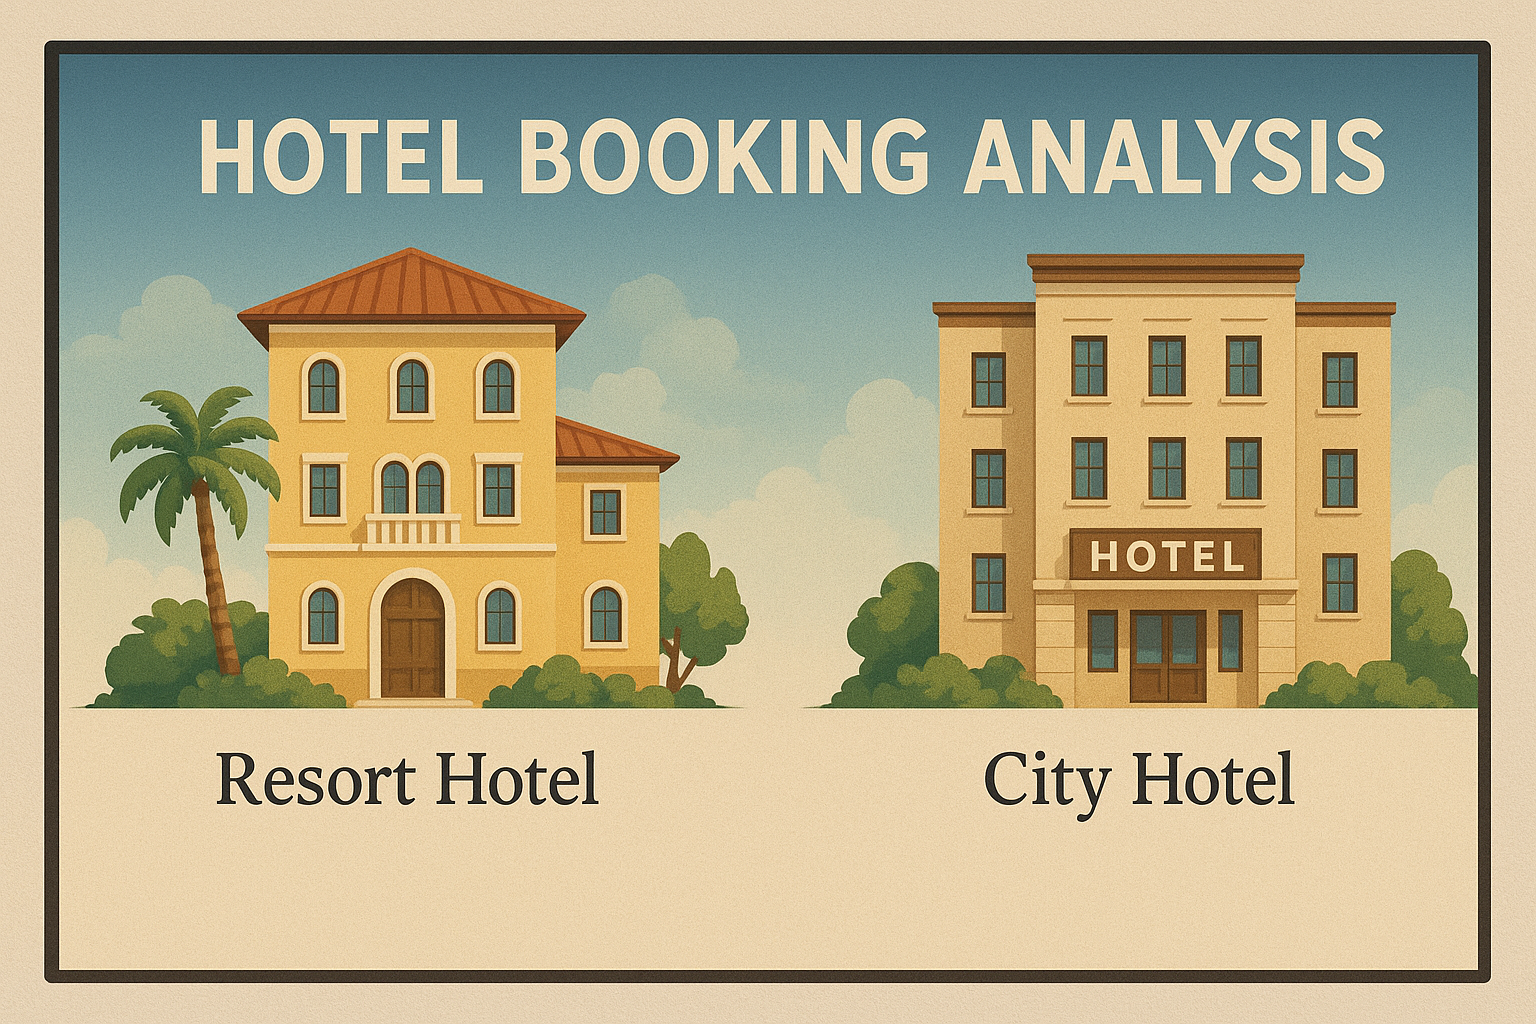

# **Project Summary -**

For this hotel booking analysis, the goal was to explore the customer data of a hotel and identify any potential trends or correlations. The purpose of this exploratory data analysis (EDA) was to explore the hotel booking data set and identify potential relationships between key variables.
The data set included customer booking information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the dataset, we built a variety of charts, including a count plot, bar plot, kdeplot, heatmap, pairplot, violin plot, and boxplot.
The data set was composed of over 119390 hotel bookings, each containing several variables such as 'hotel', 'is_canceled', 'lead_time', For this hotel booking analysis, the goal was to explore the customer data of a hotel and identify any potential trends or correlations. The purpose of this exploratory data analysis (EDA) was to explore the hotel booking data set and identify potential relationships between key variables.
The data set included customer booking information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', and 'reservation_status_date'.
Dataset variables are in int64, float64, and object datatypes. There are 32 variables: 12 variables are objects, 16 are int64, and 4 are float64. 31994 duplicate values were removed. The variables country had 452, children had 4, agent had 12193, and company had 82137 null values. We replaced the null value with the mode of each variable (country, children, agent) for these variables, but the variable "company" had more than 50% null value, so we removed it. Further, we removed outliers from lead_time and adr. The final dataset had 87396 observations.
We also changed the data types of variables children, agent, and reservation_status_date to int64, int64, and datetime64, respectively. We performed some feature engineering for more convenience and created new variables: total_stays, total_people, total_childrens, reserved_room_assigned, guest_category, and lead_time_category. Now total_people and total_childrens are in the floated 64 datatype, so we converted them to int64. Now We were removed from the observation because having total_people at 0 made no sense.

# **Problem Statement**


Our problem statement is that we have to book a hotel/resort so then we need to check which one is best, depends on some of the aspect like what is the seasonality and what are the top performing months? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? and what are the top countries in terms of booking and revenue? what the most frequent guest type? This hotel booking dataset can help you explore those questions!

#### **Define Your Business Objective?**

Explore and analyze the data to discover results and statistics

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn.widgets import color_palette
import plotly
import plotly.express as px

In [2]:
# way to upload file from drive
# mount google drive with google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path ='/content/drive/MyDrive/Capstone Project/[Module - 2] Numerical Programming in Python/Hotel Bookings.csv'

In [4]:
# Load Dataset
df = pd.read_csv(data_path)

### Dataset First View

In [5]:
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [6]:
# it will shows the data of first five rows
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [7]:
#it will shows the data of last five rows
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

### Dataset Rows & Columns count

In [9]:
#it will gives the no. of rows and columns
df.shape

(119390, 32)

### Dataset Information

In [10]:
#it will gives the information of all the columns,values,etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
missing_counts = df.isnull().sum()
missing_counts

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64